In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

from langdetect import detect

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)

Below code is inspired by: https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data/notebook

In [2]:
#reading the previously saved dataframe
df = pd.read_csv('prepared_df')

In [4]:
df['language'].value_counts(normalize=True)*100

en       67.816806
de       19.248742
fr        4.207364
es        3.036019
it        1.213509
nl        0.975747
ru        0.575818
ko        0.407913
pt        0.348036
da        0.339553
zh-cn     0.293148
sv        0.154433
no        0.151190
af        0.146699
ro        0.140961
pl        0.134973
ca        0.134474
fi        0.103787
cs        0.099047
so        0.070855
ja        0.065615
tr        0.044409
el        0.042413
id        0.041166
hu        0.039669
cy        0.025947
tl        0.024949
et        0.016716
sk        0.016716
hr        0.014720
vi        0.010728
he        0.010478
sw        0.007984
uk        0.007235
zh-tw     0.007235
sl        0.006986
bg        0.004990
lt        0.003742
lv        0.002495
sq        0.002245
mk        0.002245
th        0.001746
ar        0.000499
Name: language, dtype: float64

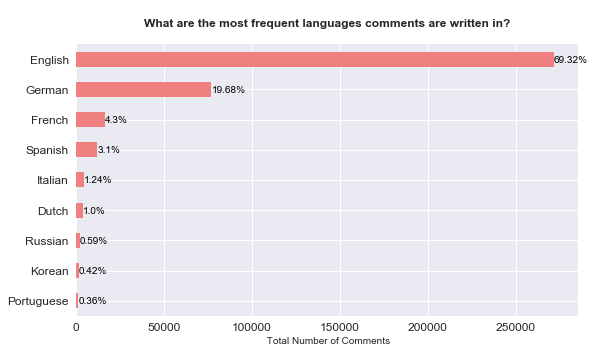

In [16]:
#visualization on graph
# visualizing the comments' languages
ax = df.language.value_counts().head(9).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch', 'Russian', 'Korean', 'Portuguese'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
# invert for largest on top 
ax.invert_yaxis()

In [17]:
# splitting the dataframes in language related sub-dataframes
df_eng = df[(df['language']=='en')]
df_de  = df[(df['language']=='de')]
df_fr  = df[(df['language']=='fr')]

WORDCLOUDS

In [30]:
# import libraries
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajankowski\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [23]:
# plotting function
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

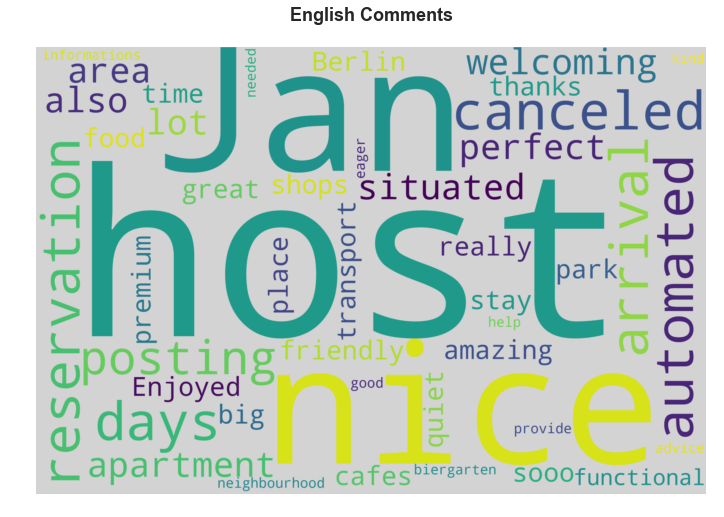

In [31]:
#English WordCloud
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

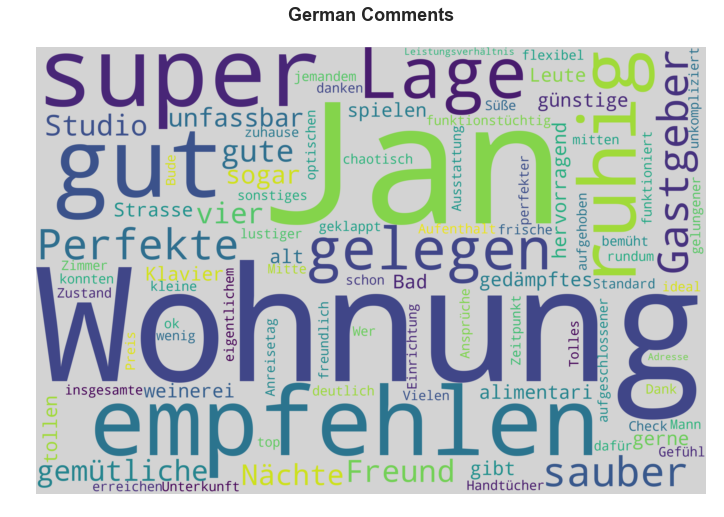

In [32]:
#German WordCloud
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('german')).generate(str(df_de.comments.values))

plot_wordcloud(wordcloud, 'German')

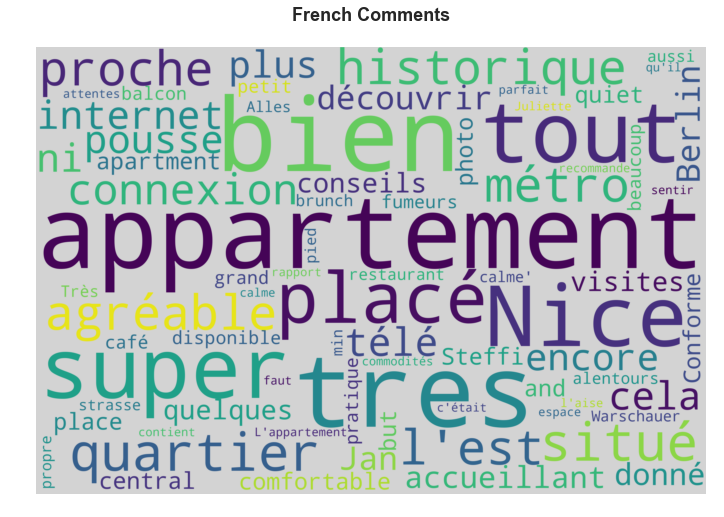

In [33]:
#French WordCloud
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('french')).generate(str(df_fr.comments.values))

plot_wordcloud(wordcloud, 'French')

SENTIMENT ANALYSIS

In [37]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ajankowski\AppData\Roaming\nltk_data...


True

In [38]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [39]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [42]:
#try on example sentence
print_sentiment_scores("Very comfortable bed and pillows, nice bathroom and the bar was really nice to have a drink in at the end of the night. Very convenient location with the hotel being just opposite the train station.")
print_sentiment_scores("It would've been nice to have a bath but I'm just being picky. It could've been good to have a balcony in order to open up the large windows and step out for some fresh air. Also it was perhaps a little on the pricey side but very much worth it.")

Very comfortable bed and pillows, nice bathroom and the bar was really nice to have a drink in at the end of the night. Very convenient location with the hotel being just opposite the train station. {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.8479}
It would've been nice to have a bath but I'm just being picky. It could've been good to have a balcony in order to open up the large windows and step out for some fresh air. Also it was perhaps a little on the pricey side but very much worth it. {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.8877}


In [43]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

VADER on English comments

In [46]:
%%time
df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

Wall time: 21min 3s


In [47]:
# write the dataframe to a csv file in order to avoid the long runtime
df_eng.to_csv('sentiment_df_eng', index=False)
df = pd.read_csv('sentiment_df_eng')

In [48]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
1,2015,69990732,2016-04-15,41944715,Hannah,"Jan was very friendly and welcoming host! The apartment was great and the area is sooo amazing, lots of nice cafes and shops! Enjoyed my time there a lot!",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.505,0.495,0.9703
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport are perfect!",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.530,0.470,0.7955
6,2015,76603178,2016-05-28,29323516,Laurent,"We had a very nice stay in Berlin, thanks to Jan's premium situated apartment. The place isn't big, but is quiet and functional, also it's situated in a perfect neighbourhood. Jan is a very welcoming host, eager to help you if needed or to provide you any kind of informations. He also has very good advice on biergarten !",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.657,0.343,0.9779
7,2015,77296201,2016-05-31,9025122,Rasmus,"Great location close to Mauerpark, Kastanienallee and Rosenthaler Platz, with lots of bars and restaurants nearby! Jan was very friendly and service minded.",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.727,0.273,0.8353
9,2015,82322683,2016-06-27,73902920,Mag,"Apartment very well located, close to everything (supermarket, transport, city center). Very quiet nights because the apartment is located on the inside of the building. It has the basic equipment for one week stay. Jan is super accessible, nice and always available.",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.811,0.189,0.8439
